In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

input\gender_submission.csv
input\test.csv
input\train.csv
input\.ipynb_checkpoints\gender_submission-checkpoint.csv
input\.ipynb_checkpoints\test-checkpoint.csv
input\.ipynb_checkpoints\train-checkpoint.csv


In [2]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## EXPLORATORY DATA ANALYSIS

In [4]:
print(f"Rows: {train_data.shape[0]}")
print(f"Columns: {train_data.shape[1]}")

Rows: 891
Columns: 12


In [5]:
print(f"Rows: {test_data.shape[0]}")
print(f"Columns: {test_data.shape[1]}")

Rows: 418
Columns: 11


In [6]:
print(f"\t\t\tNull Values in the Training Dataset \n{train_data.isnull().sum()}")

			Null Values in the Training Dataset 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print(f"\t\t\t\t Description of the Dataset \n {train_data.describe()}")

				 Description of the Dataset 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Visualization of each column

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

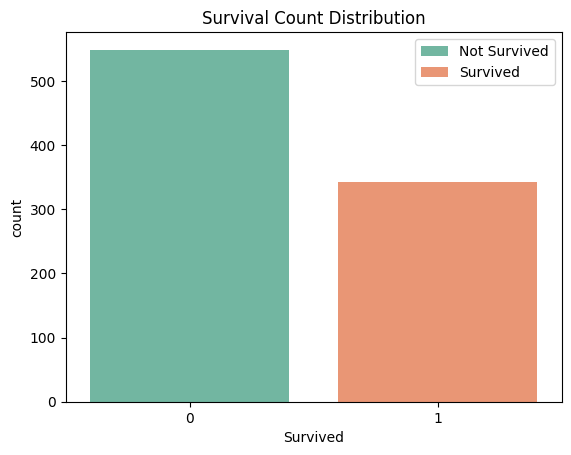

In [9]:
sns.countplot(x = "Survived", data = train_data, palette = "Set2", hue = "Survived")
plt.title("Survival Count Distribution")
plt.legend(labels=["Not Survived","Survived"])
plt.show()

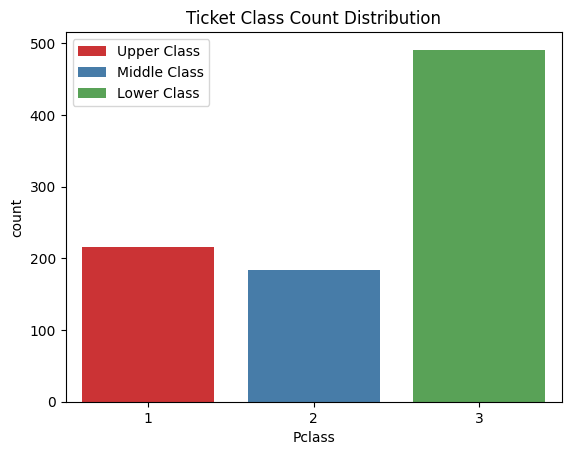

In [10]:
sns.countplot(x = "Pclass", data = train_data, palette = "Set1", hue = "Pclass")
plt.title("Ticket Class Count Distribution")
plt.legend(labels=["Upper Class","Middle Class","Lower Class"])
plt.show()

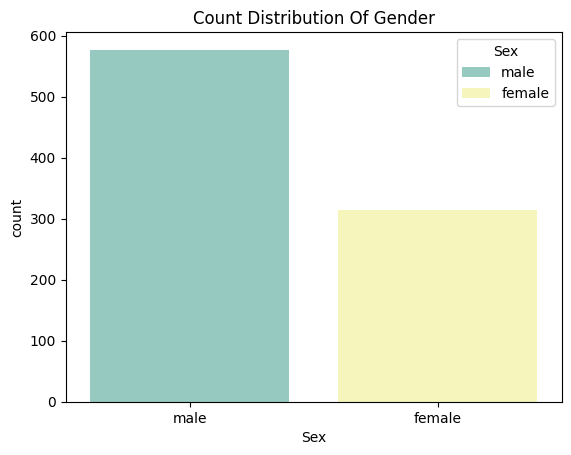

In [11]:
sns.countplot(x = "Sex", data = train_data, palette = "Set3", hue = "Sex", legend = True)
plt.title("Count Distribution Of Gender")
plt.show()

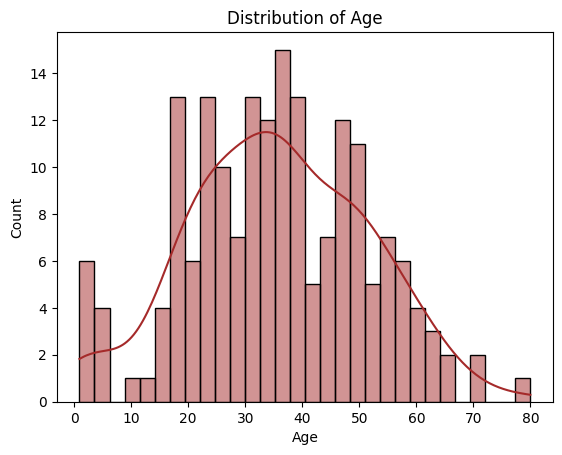

In [12]:
sns.histplot(x = "Age", data = train_data.dropna(), kde = True, bins = 30, color = "brown")
plt.title("Distribution of Age")
plt.show()

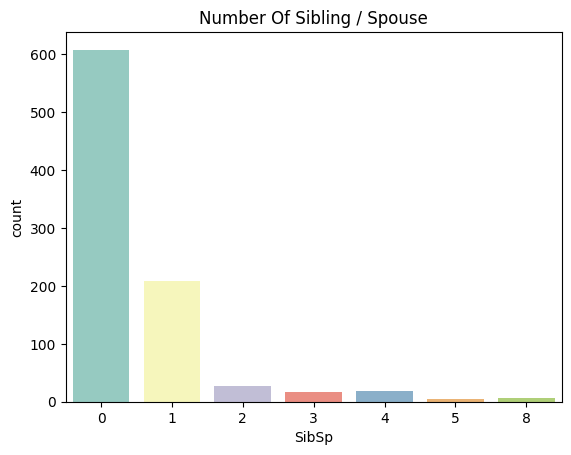

In [13]:
sns.countplot(x = "SibSp", data = train_data, palette = "Set3", hue = "SibSp", legend = False)
plt.title("Number Of Sibling / Spouse")
plt.show()

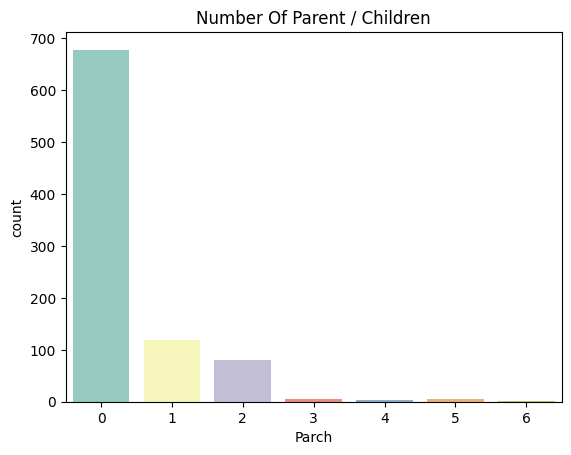

In [14]:
sns.countplot(x = "Parch", data = train_data, palette = "Set3", hue = "Parch", legend = False)
plt.title("Number Of Parent / Children")
plt.show()

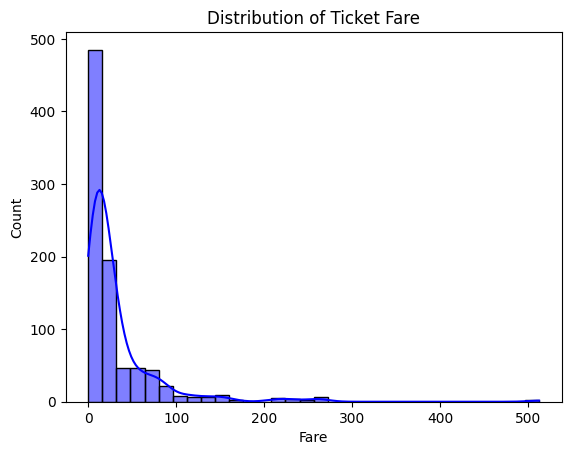

In [15]:
sns.histplot(x = "Fare", data = train_data, kde = True, bins = 32, color = "blue")
plt.title("Distribution of Ticket Fare")
plt.show()

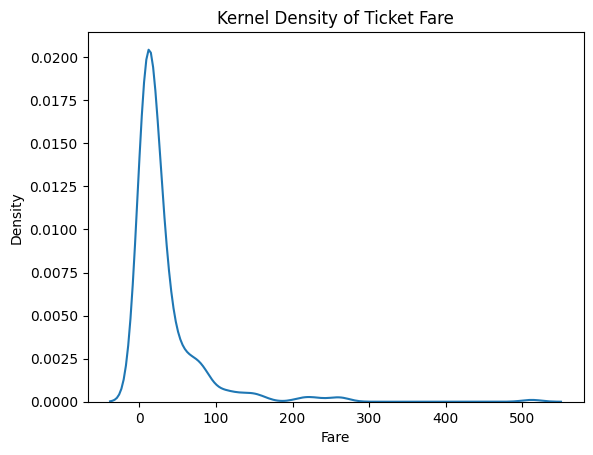

In [16]:
sns.kdeplot(x = "Fare", data = train_data)
plt.title("Kernel Density of Ticket Fare")
plt.show()

In [17]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### DATA PRE-PROCESSING

In [18]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)
train_data["Fare"].fillna(train_data["Fare"].mean(), inplace =True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace = True)
test_data["Fare"].fillna(test_data["Fare"].mean(), inplace =True)

In [19]:
train_data = train_data.drop(columns = ["Name","Ticket","Cabin"])

#### One Hot Encoding

In [20]:
train_data_encoded = pd.get_dummies(data = train_data, columns = ["Sex","Embarked"])
display(train_data_encoded.head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [21]:
test_data = test_data.drop(columns = ["Name","Ticket","Cabin"])

In [22]:
test_data_encoded = pd.get_dummies(data = test_data, columns = ["Sex","Embarked"])
display(test_data_encoded.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,True,False,True,False
1,893,3,47.0,1,0,7.0000,True,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,True,False,True,False
3,895,3,27.0,0,0,8.6625,False,True,False,False,True
4,896,3,22.0,1,1,12.2875,True,False,False,False,True


In [23]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_C   891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 53.2 KB


In [24]:
test_data_encoded["Fare"].unique()

array([  7.8292    ,   7.        ,   9.6875    ,   8.6625    ,
        12.2875    ,   9.225     ,   7.6292    ,  29.        ,
         7.2292    ,  24.15      ,   7.8958    ,  26.        ,
        82.2667    ,  61.175     ,  27.7208    ,  12.35      ,
         7.225     ,   7.925     ,  59.4       ,   3.1708    ,
        31.6833    ,  61.3792    , 262.375     ,  14.5       ,
        61.9792    ,  30.5       ,  21.6792    ,  31.5       ,
        20.575     ,  23.45      ,  57.75      ,   8.05      ,
         9.5       ,  56.4958    ,  13.4167    ,  26.55      ,
         7.85      ,  13.        ,  52.5542    ,  29.7       ,
         7.75      ,  76.2917    ,  15.9       ,  60.        ,
        15.0333    ,  23.        , 263.        ,  15.5792    ,
        29.125     ,   7.65      ,  16.1       ,  13.5       ,
         7.725     ,  21.        ,   7.8792    ,  42.4       ,
        28.5375    , 211.5       ,  25.7       ,  15.2458    ,
       221.7792    ,  10.7083    ,  14.4542    ,  13.9 

In [25]:
target_correlation = train_data_encoded.corr()["Survived"].sort_values(ascending=True)
print(target_correlation)

Sex_male      -0.543351
Pclass        -0.338481
Embarked_S    -0.155660
Age           -0.069809
SibSp         -0.035322
PassengerId   -0.005007
Embarked_Q     0.003650
Parch          0.081629
Embarked_C     0.168240
Fare           0.257307
Sex_female     0.543351
Survived       1.000000
Name: Survived, dtype: float64


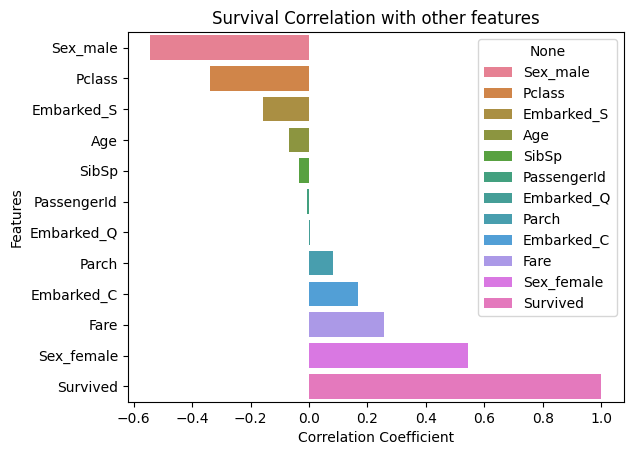

In [26]:
sns.barplot(x = target_correlation.values, y = target_correlation.index, palette = "husl", hue = target_correlation.index, legend = True)
plt.title("Survival Correlation with other features")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

In [27]:
y = train_data_encoded["Survived"]
X = train_data_encoded.drop("Survived", axis = 1)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [29]:
classifiers = {"Random Forest": RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_leaf=3, random_state=40, verbose = True, warm_start = True),
              "Decision Tree":DecisionTreeClassifier(criterion = "entropy", splitter= "best", max_depth=None, random_state=40),
              "KNN":KNeighborsClassifier(n_neighbors=3, weights="distance"),
              "Logistic Regression":LogisticRegression(random_state=40)}

In [30]:
for name, classifier in classifiers.items():
    classifier.fit(X, y)
    prediction = classifier.predict(test_data_encoded)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction})
    output.to_csv(f'{name}.csv', index=False)
    print("Your submission was successfully saved!")

Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
C:\Users\KEERTHI RAJ\anaconda3\envs\titanic\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### HYPER PARAMETER TUNING

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
y = train_data_encoded["Survived"]
X = train_data_encoded.drop("Survived", axis = 1)

In [33]:
classifiers = {"Random Forest": RandomForestClassifier(),
              "Decision Tree":DecisionTreeClassifier(),
              "KNN":KNeighborsClassifier(),
              "Logistic Regression":LogisticRegression()}

In [34]:
param_grid_RandomClassifier = {
    "n_estimators": [50,100,150,200],
    "max_depth": [None, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4],
    "random_state":[42]
}

param_grid_DecisionTreeClassifier = {
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None, 10, 15, 20],
    "random_state":[42]
}

param_grid_KNearestNeighbour = {
    "n_neighbors": [5, 7, 9, 11],
    "weights":["uniform","distance"]
}

param_grid_LogisticRegression = {
    "penalty": ["l1", "l2"],
    "random_state":[42]
}

In [36]:
for name, classifier in classifiers.items():
    if name == "Random Forest":
        gridSearch = GridSearchCV(classifier, param_grid_RandomClassifier, cv = 10, scoring = "accuracy", n_jobs = -1, verbose = 4)
    elif name == "Decision Tree":
        gridSearch = GridSearchCV(classifier, param_grid_DecisionTreeClassifier, cv = 10, scoring = "accuracy", n_jobs = -1, verbose = 4)
    elif name == "KNN":
        gridSearch = GridSearchCV(classifier, param_grid_KNearestNeighbour, cv = 10, scoring = "accuracy", n_jobs = -1, verbose = 4)
    elif name == "Logistic Regression":
        gridSearch = GridSearchCV(classifier, param_grid_LogisticRegression, cv = 10, scoring = "accuracy", n_jobs = -1, verbose = 4)
    else:
        gridSearch = classifier

    gridSearch.fit(X,y)
    print(f"Best Hyper parameters for {name}: {gridSearch.best_params_}")

    model = gridSearch.best_estimator_
    predictions = model.predict(test_data_encoded)

    output = pd.DataFrame({"PassengerId": test_data.PassengerId, "Survived": predictions})
    output.to_csv(f"{name}_tuned.csv", index = False)

    print(f"Your submission was successfully saved!")

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Best Hyper parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Your submission was successfully saved!
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Hyper parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'random_state': 42, 'splitter': 'best'}
Your submission was successfully saved!
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Hyper parameters for KNN: {'n_neighbors': 11, 'weights': 'uniform'}
Your submission was successfully saved!
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best Hyper parameters for Logistic Regression: {'penalty': 'l2', 'random_state': 42}
Your submission was successfully saved!


C:\Users\KEERTHI RAJ\anaconda3\envs\titanic\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KEERTHI RAJ\anaconda3\envs\titanic\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KEERTHI RAJ\anaconda3\envs\titanic\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\KEERTHI RAJ\anaconda3\envs\titanic\lib\site-packages\sklearn\linear_model\_logistic.py", line 1